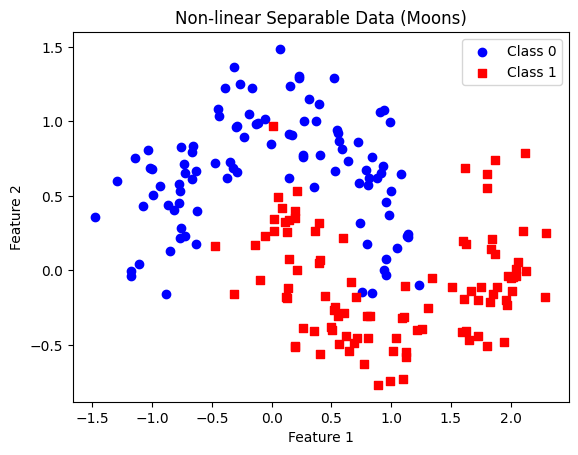

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Ensure inline plotting (only needed for Jupyter notebooks)
%matplotlib inline

# Generate a non-linear separable dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', marker='o', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='s', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-linear Separable Data (Moons)")
plt.legend()
plt.show()


The Polynomial Kernel Equation is:
<br>
<br>
$K(x, x') = (γ \cdot [x, x'] + coefO)^{degree}$
<br>
<br>
where:
<br>
γ is a scaling parameter 
<br>
coef0 is a constant to control the influence of higher-order terms
<br>
degree is the degree of the polynomial kernel.

Polynomial Kernel SVM Accuracy: 0.96


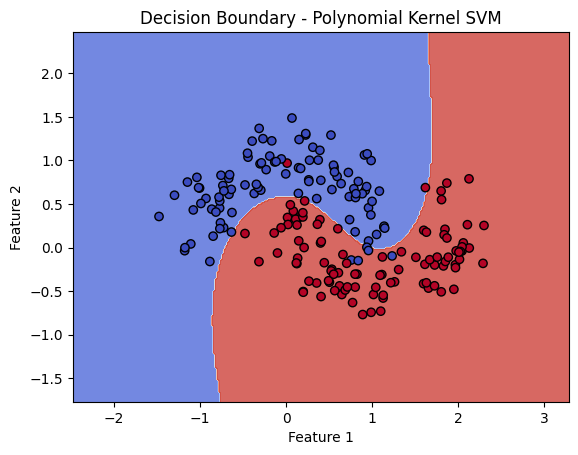

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Polynomial Kernel SVM
polynomial_svm = SVC(kernel='poly', degree=3, coef0=1, C=1)
polynomial_svm.fit(X, y)

# Predictions and accuracy
y_pred_poly = polynomial_svm.predict(X)
accuracy_poly = accuracy_score(y, y_pred_poly)
print(f"Polynomial Kernel SVM Accuracy: {accuracy_poly:.2f}")

# Plot the decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

plot_decision_boundary(polynomial_svm, X, y, "Decision Boundary - Polynomial Kernel SVM")


The high accuracy of 0.96 indicates that the polynomial kernel SVM performs well on this non-linear dataset. 

The Polynomial Kernel Equation is:
<br>
<br>
$K(x, x') = exp(-γ||x-x'||^{degree})$
<br>
<br>
where:
<br>
γ is a parameter that defines the width of the Gaussian function.


RBF Kernel SVM Accuracy: 0.94


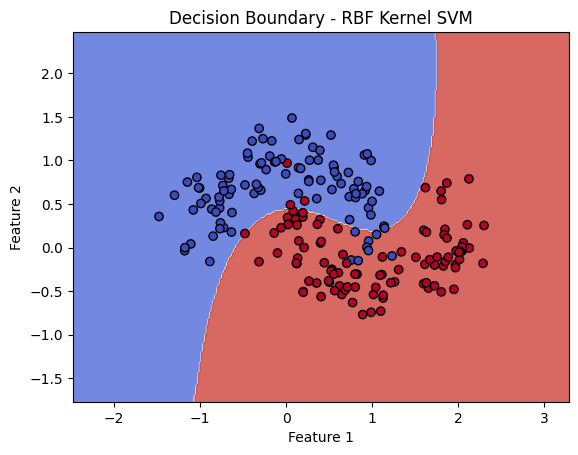

In [7]:
# RBF Kernel SVM
rbf_svm = SVC(kernel='rbf', gamma=0.5, C=1)
rbf_svm.fit(X, y)

# Predictions and accuracy
y_pred_rbf = rbf_svm.predict(X)
accuracy_rbf = accuracy_score(y, y_pred_rbf)
print(f"RBF Kernel SVM Accuracy: {accuracy_rbf:.2f}")

# Plot the decision boundary for RBF kernel
plot_decision_boundary(rbf_svm, X, y, "Decision Boundary - RBF Kernel SVM")


A 0.94 accuracy with the RBF kernel SVM is also quite strong for this dataset, highlighting that the RBF kernel is similarly effective in capturing non-linear patterns in the make_moons data.

I'll now be messing around with is the Spiral Dataset! I'll be using code similar to the one provided below: https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5\

I'll start by generating a synthetic spiral dataset with 200 points

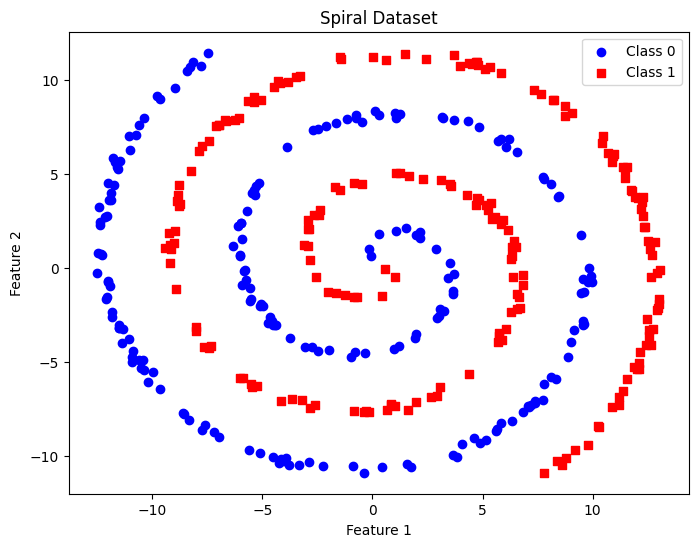

In [10]:
#  generate spiral dataset
def generate_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points) * noise
    d2x = np.cos(n) * n + np.random.rand(n_points) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_points) * noise
    X = np.vstack((np.hstack((d1x, d2x)), np.hstack((d1y, d2y)))).T
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

# Generate the data
X, y = generate_spiral(200)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', marker='o', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='s', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spiral Dataset")
plt.legend()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now I'll train the SVM with polynomial kernel

In [19]:
# Train and evaluate SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3, coef0=1, C=1)
poly_svm.fit(X_train, y_train)

y_pred_poly = poly_svm.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print(f"Polynomial Kernel SVM Accuracy: {accuracy_poly:.4f}")

Polynomial Kernel SVM Accuracy: 0.7333


Now I'll train the SVM with RBF kernel

In [20]:
# Train and evaluate SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1)
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"RBF Kernel SVM Accuracy: {accuracy_rbf:.4f}")

RBF Kernel SVM Accuracy: 0.6167


It seems that the Polynomial Kernel achieved a higher accuracy at 0.73 than the RBF Kernel at 0.62 on the spiral dataset. I'm not totatlly sure what caused that variation in accuracy. Maybe I'll try and manually change the value for gamma.

Now I'll be plotting the results to better visualise it!

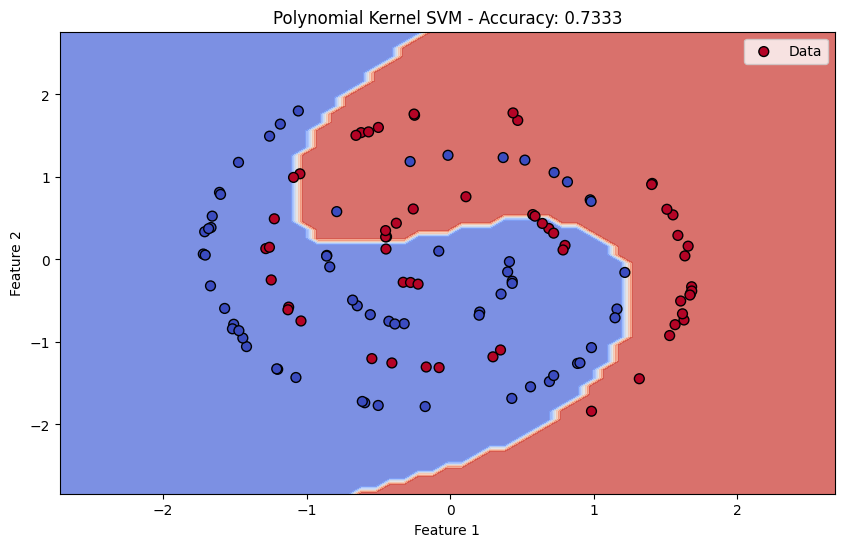

In [21]:
def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50, label='Data')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

# Plot decision boundary for Polynomial Kernel
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_test, y_test, poly_svm, title=f"Polynomial Kernel SVM - Accuracy: {accuracy_poly:.4f}")
plt.show()

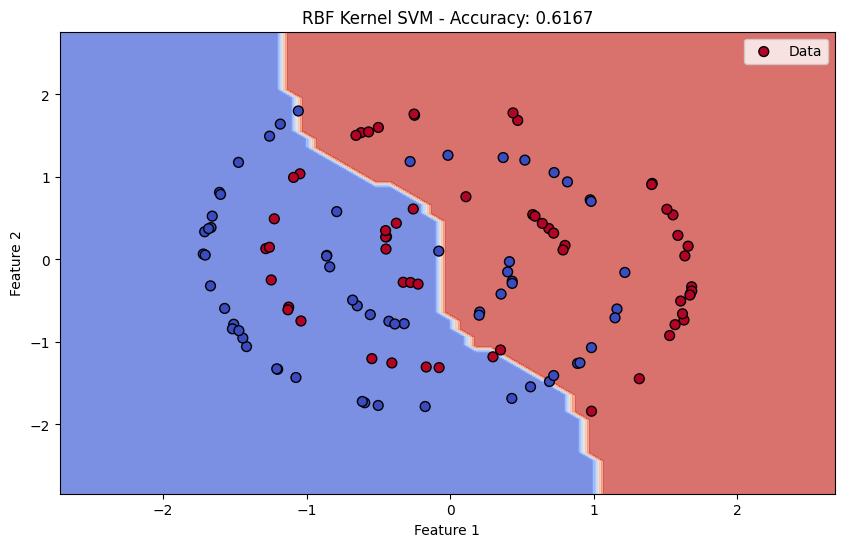

In [22]:
# Plot decision boundary for RBF Kernel
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_test, y_test, rbf_svm, title=f"RBF Kernel SVM - Accuracy: {accuracy_rbf:.4f}")
plt.show()

I'd have to conclude this experiment with a couple of questions. Hopefully I'll be answer them in my next report. However, beyond that, my results have shown that the polynomial kernel, which maps the data into a higher-dimensional space using polynomial features, demonstrated good performance on both make_moons and spiral datasets. The RBF kernel showed a slightly lower accuracy indicating that while it can model complex decision boundaries, it was less effective on this dataset compared to the polynomial kernel. 

Moreover, there is a noticable di